In [12]:
import pandas as pd
import mplfinance as mpf

In [13]:
import rbot

In [14]:
bb = rbot.DummyBb()
bb.log_load(10)


In [20]:
def array_to_df(array):
    ohlcv_df = pd.DataFrame(ohlcv, columns=["timestamp", "open", "high", "low", "close", "volume"]) 
    ohlcv_df['timestamp'] = pd.to_datetime((ohlcv_df["timestamp"]), utc=True, unit='ms')
    ohlcv_df = ohlcv_df.set_index('timestamp')

    return ohlcv_df
    

In [21]:
ohlcv = bb.ohlcv(bb.log_start_ms, bb.log_end_ms, 60 * 60 * 2)

ohlcv_df = array_to_df(ohlcv)





In [22]:
ohlcv_df

,open,high,low,close,volume
timestamp,,,,,
2022-06-15 00:00:00+00:00,22092.5,22272.0,21700.5,22125.5,156210458.0
2022-06-15 02:00:00+00:00,22127.5,22136.5,21345.0,21409.5,103107015.0
2022-06-15 04:00:00+00:00,21410.0,21445.0,20656.0,21168.0,305058215.0
2022-06-15 06:00:00+00:00,21168.0,21407.5,20597.0,20677.5,228970410.0
2022-06-15 08:00:00+00:00,20677.0,20711.5,20051.5,20186.5,376257475.0
...,...,...,...,...,...
2022-06-24 14:00:00+00:00,21172.0,21355.0,20783.5,20862.5,114425742.0
2022-06-24 16:00:00+00:00,20862.0,21197.0,20756.0,20946.0,84700533.0
2022-06-24 18:00:00+00:00,20941.5,21247.5,20868.5,21220.0,51176908.0


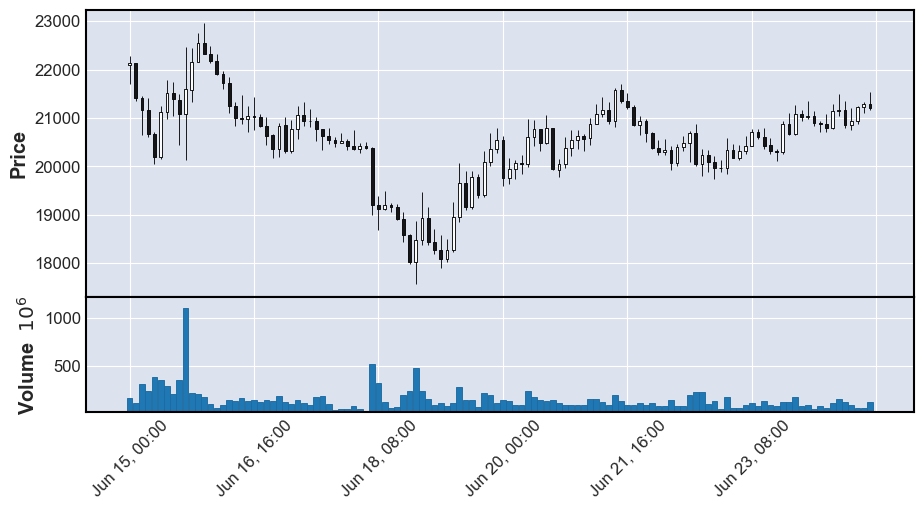

In [19]:

mpf.plot(ohlcv_df, type='candle', volume=True, figratio=(16,8))





In [24]:
ohlcv_df

,open,high,low,close,volume
timestamp,,,,,
2022-06-15 00:00:00+00:00,22092.5,22272.0,21700.5,22125.5,156210458.0
2022-06-15 02:00:00+00:00,22127.5,22136.5,21345.0,21409.5,103107015.0
2022-06-15 04:00:00+00:00,21410.0,21445.0,20656.0,21168.0,305058215.0
2022-06-15 06:00:00+00:00,21168.0,21407.5,20597.0,20677.5,228970410.0
2022-06-15 08:00:00+00:00,20677.0,20711.5,20051.5,20186.5,376257475.0
...,...,...,...,...,...
2022-06-24 14:00:00+00:00,21172.0,21355.0,20783.5,20862.5,114425742.0
2022-06-24 16:00:00+00:00,20862.0,21197.0,20756.0,20946.0,84700533.0
2022-06-24 18:00:00+00:00,20941.5,21247.5,20868.5,21220.0,51176908.0


In [27]:
ohlcv_df["range"] = ohlcv_df["high"] - ohlcv_df["low"]

In [31]:
ohlcv_df["range"].mean()

560.8166666666667

In [38]:
latest = ohlcv_df[0:1]
print(latest["open"] - latest["high"])
print(latest["open"] - latest["low"])

timestamp
2022-06-15 00:00:00+00:00   -179.5
dtype: float64
timestamp
2022-06-15 00:00:00+00:00    392.0
dtype: float64


In [83]:
class Agent:
    def __init__(self):
            self.K = 1.6                            # パラメターKを1.6とする。

    def on_event(self, time_ms, action, price, size):
        pass
        #//print("E", time_ms, action, price, size)

    def on_tick(self, time_ms, session):
        # 
        ohlcv_array = session.ohlcv(60*60*2, 6)     # 最新足０番目　＋　５本の足を取得。 インデック順に古くなる（逆順）
        ohlcv_df = array_to_df(ohlcv_array)            # ndarrayをDataFrameへ変換

        ohlcv_df["range"] = ohlcv_df["high"] - ohlcv_df["low"]      # レンジを計算

        ohlcv_latest = ohlcv_df[0:1]       # 最新
        ohlcv_last_5 = ohlcv_df[2:]       # 過去５本足

        print(ohlcv_latest)

        print(ohlcv_last_5)

        range = ohlcv_last_5["range"].mean()

        latest_start_high = ohlcv_latest["high"].mean() - ohlcv_latest["open"].mean()
        latest_start_low  = ohlcv_latest["open"].mean() - ohlcv_latest["low"].mean()

        if range < latest_start_high:
            print("Long")
        
        if range < latest_start_low:
            print("short")

    
    def on_update(self, result):
        print("update", result.status)

In [84]:
agent = Agent()

In [85]:
bb.debug_loop_count = 1

In [86]:
bb.run(agent, 60*60*2)

call back tick by 7200[sec]
call back by update
call back by all log events
                              open     high      low    close       volume  \
timestamp                                                                    
2022-06-15 00:00:00+00:00  22092.5  22272.0  21700.5  22125.5  156210458.0   

                           range  
timestamp                         
2022-06-15 00:00:00+00:00  571.5  
                              open     high      low    close       volume  \
timestamp                                                                    
2022-06-15 04:00:00+00:00  21410.0  21445.0  20656.0  21168.0  305058215.0   
2022-06-15 06:00:00+00:00  21168.0  21407.5  20597.0  20677.5  228970410.0   
2022-06-15 08:00:00+00:00  20677.0  20711.5  20051.5  20186.5  376257475.0   
2022-06-15 10:00:00+00:00  20187.0  21240.5  20150.0  21125.0  347829534.0   
2022-06-15 12:00:00+00:00  21124.5  21780.0  20984.5  21513.5  280968126.0   
...                            ...    

In [74]:
tr = bb.transactions

In [75]:
import pandas as pd

In [76]:
for item in tr:
    print(item)

In [77]:
timestamp = []
order_id = []
order_sub_id = []
order_type = []
post_only = []
create_time = []
status = []
open_price = []
close_price = []
size = []
volume = []
profit = []
fee = []
total_profit = []
message = []

for item in tr:
    timestamp.append(item.timestamp)
    order_id.append(item.order_id)
    order_sub_id.append(item.order_sub_id)
    order_type.append(item.order_type)
    post_only.append(item.post_only)
    create_time.append(item.create_time)
    status.append(item.status)
    open_price.append(item.open_price)
    close_price.append(item.close_price)
    size.append(item.size)
    volume.append(item.volume)
    profit.append(item.profit)
    fee.append(item.fee)
    total_profit.append(item.total_profit)
    message.append(item.message)





In [60]:
df = pd.DataFrame(
data = {"timestamp": timestamp, "order_id": order_id, "sub_id": order_sub_id, 
"order_type": order_type, "post_only": post_only, "create_time": create_time,
"status":  status, "open_price": open_price, "close_price": close_price, 
"size": size, "volume": volume, "profit": profit, "fee": fee,
"total_profit":total_profit, "message": message},
columns = ["timestamp", "order_id", "sub_id", "order_type", "post_only",
"create_time", "status", "open_price", "close_price","size", "volume", 
"profit", "fee","total_profit", "message"]
)
df["timestamp"] = pd.to_datetime((df["timestamp"]), utc=True, unit='ms')
df["create_time"] = pd.to_datetime((df["create_time"]), utc=True, unit='ms')


In [61]:
df

,timestamp,order_id,sub_id,order_type,post_only,create_time,status,open_price,close_price,size,volume,profit,fee,total_profit,message


In [12]:
global_ohlcv

[]

In [16]:
agent.ohlcv

array([[1.65602868e+12, 2.10965000e+04, 2.10965000e+04, 2.10730000e+04,
        2.10730000e+04, 5.78182000e+05],
       [1.65602862e+12, 2.10750000e+04, 2.11000000e+04, 2.10750000e+04,
        2.10970000e+04, 3.61443000e+05],
       [1.65602856e+12, 2.10775000e+04, 2.10800000e+04, 2.10750000e+04,
        2.10750000e+04, 1.79245000e+05],
       [1.65602850e+12, 2.10690000e+04, 2.10805000e+04, 2.10690000e+04,
        2.10770000e+04, 1.58544000e+05],
       [1.65602844e+12, 2.10705000e+04, 2.10790000e+04, 2.10685000e+04,
        2.10690000e+04, 3.16112000e+05],
       [1.65602838e+12, 2.10555000e+04, 2.10730000e+04, 2.10550000e+04,
        2.10725000e+04, 1.01685000e+05],
       [1.65602832e+12, 2.10300000e+04, 2.10560000e+04, 2.10280000e+04,
        2.10560000e+04, 4.25686000e+05],
       [1.65602826e+12, 2.10560000e+04, 2.10600000e+04, 2.10300000e+04,
        2.10300000e+04, 1.38052400e+06],
       [1.65602820e+12, 2.10645000e+04, 2.10715000e+04, 2.10550000e+04,
        2.10560000e+04, 

In [43]:
#index = range(len(agent.ohlcv))
ohlcv_df = pd.DataFrame(agent.ohlcv, columns=["timestamp", "open", "high", "low", "close", "vol"]) #index=index))
ohlcv_df['timestamp'] = pd.to_datetime((ohlcv_df["timestamp"]), utc=True, unit='ms')
#ohlcv_df = df.sort_values("timestamp", ascending=False)



In [40]:
ohlcv_df

,timestamp,open,high,low,close,vol
0,2022-06-23 23:58:00+00:00,21096.5,21096.5,21073.0,21073.0,578182.0
1,2022-06-23 23:57:00+00:00,21075.0,21100.0,21075.0,21097.0,361443.0
2,2022-06-23 23:56:00+00:00,21077.5,21080.0,21075.0,21075.0,179245.0
3,2022-06-23 23:55:00+00:00,21069.0,21080.5,21069.0,21077.0,158544.0
4,2022-06-23 23:54:00+00:00,21070.5,21079.0,21068.5,21069.0,316112.0
...,...,...,...,...,...,...
95,2022-06-23 22:23:00+00:00,20818.5,20861.0,20815.0,20850.5,906002.0
96,2022-06-23 22:22:00+00:00,20800.5,20831.5,20800.5,20818.0,778014.0
97,2022-06-23 22:21:00+00:00,20797.0,20804.5,20790.0,20797.0,533457.0
98,2022-06-23 22:20:00+00:00,20815.0,20817.0,20790.5,20793.5,1912237.0


In [28]:
ohlcv_df["timestamp"]%1_000_00000

0     28680000.0
1     28620000.0
2     28560000.0
3     28500000.0
4     28440000.0
         ...    
95    22980000.0
96    22920000.0
97    22860000.0
98    22800000.0
99    22740000.0
Name: timestamp, Length: 100, dtype: float64